In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/purzelrakete/src/github.com/feldberlin/deepspeech


In [2]:
import os

import numpy as np
import torch
from torch.nn import functional as F
import torch.cuda.amp as amp
import matplotlib.pyplot as plt
import IPython.display as ipd
import wandb

from deepspeech import model, train, datasets, utils, predict, viz

/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


## Prediction

In [3]:
m, pt = predict.load('purzelrakete/feldberlin-deepspeech/212d0t74')
p = m.cfg
p.graphemes = np.array(p.graphemes)

In [4]:
ds = datasets.yesno(p)
ds = datasets.SpecAugmented(ds, p, masked=False)

In [5]:
batch = [ds[i] for i in range(8)]
x, xn, y, yn = datasets.batch(p)(batch)

/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  normalized, onesided, return_complex)
/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  normalized, onesided, return_complex)


In [6]:
yhat, loss = predict.predict(m, x, xn, y, yn)

In [7]:
loss

tensor(0.0097, device='cuda:0')

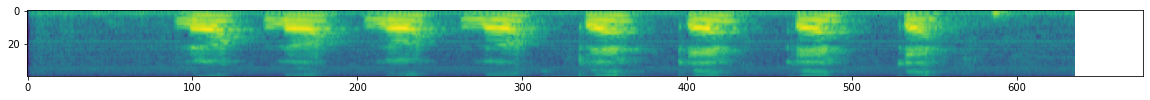

In [8]:
plt.figure(figsize=(20, 20))
plt.imshow(x[0].log2().detach().numpy())

tensor(0.0097, device='cuda:0')


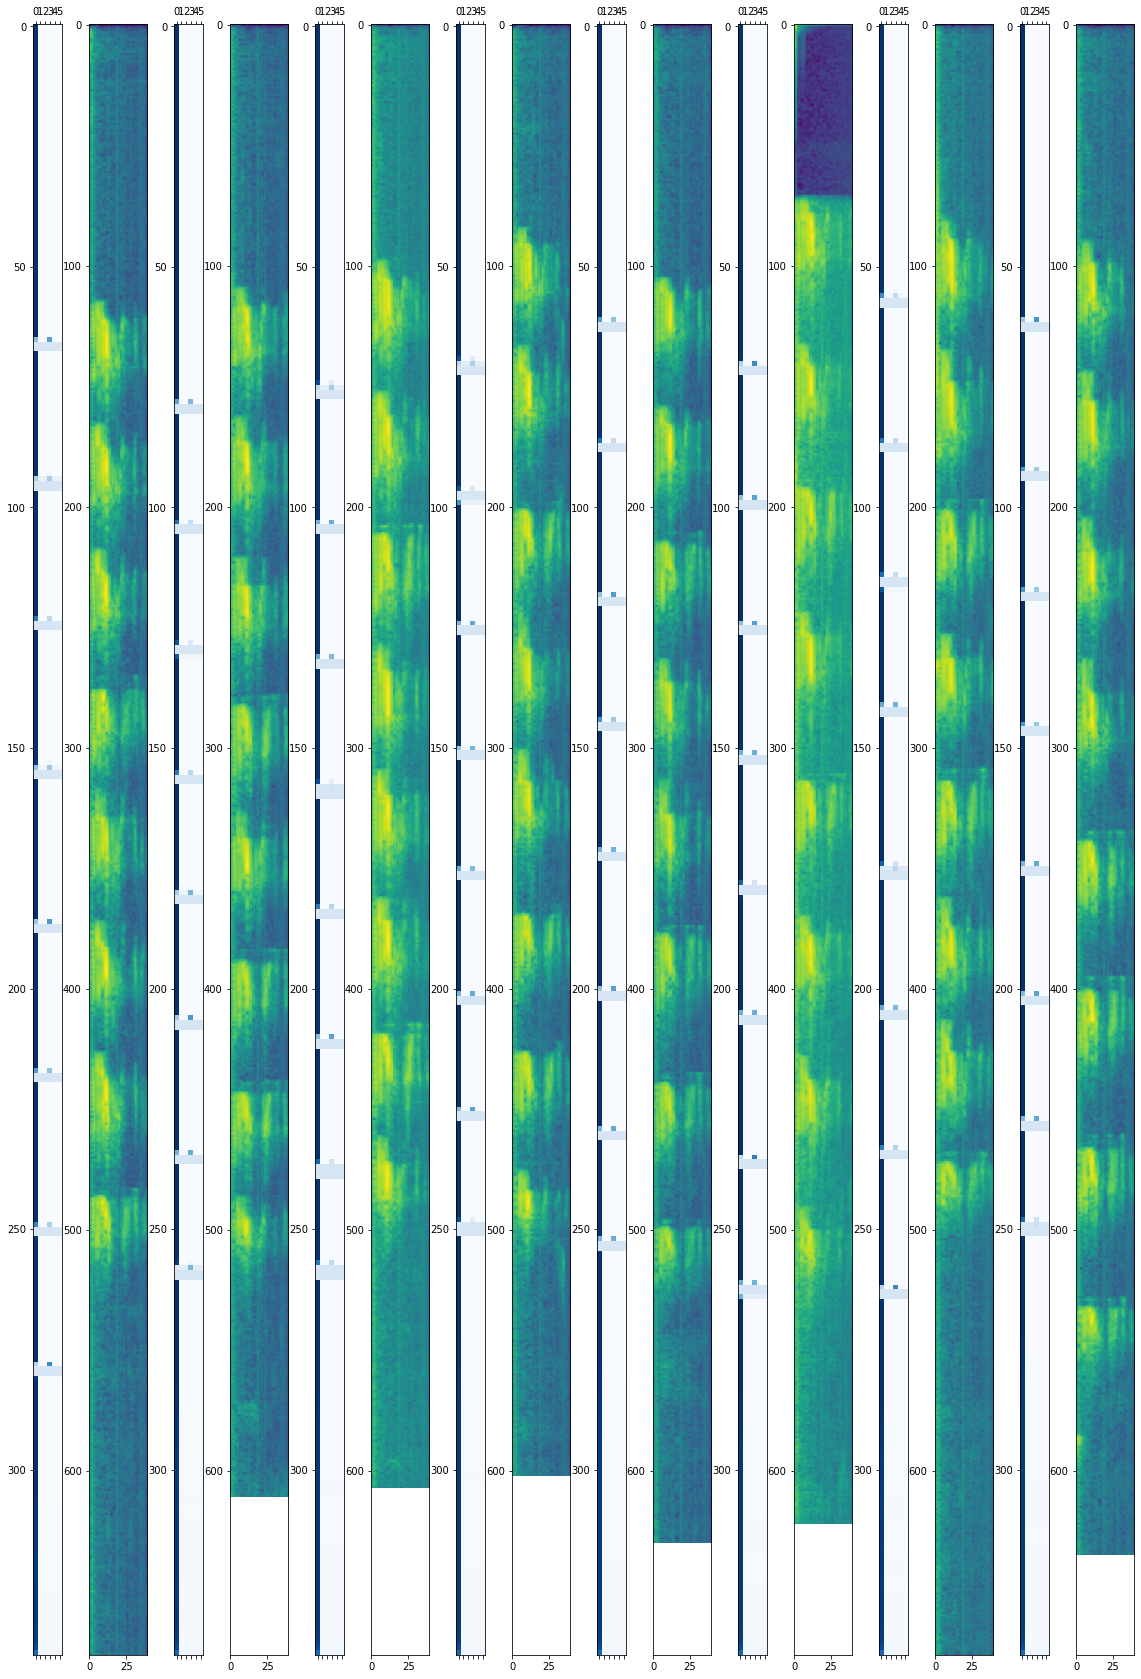

In [9]:
viz.ctc_batch(m, batch, p)